1. Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


2. Import Datasets 

In [2]:
#Import Original weather data 

df_oweather = pd.read_csv("Weather Training Data.csv")
print(df_oweather.shape)
df_oweather.head()

(99516, 23)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
df_oweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [4]:
#get the sum of null values in a column 
print(df_oweather.isnull().sum())

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64


In [5]:
#Import future data prediction data

df_future_weather = pd.read_csv("Weather Test Data.csv")
print(df_future_weather.shape)
df_future_weather.head() 

(42677, 22)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [6]:
df_future_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [7]:
#get the sum of null values in future dataset
df_future_weather.isnull().sum()

row ID               0
Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64

3. Pre-processing data 

In [8]:
#Pre-process original dataset

#Updating the null values in numerical columns with mean of corresponding values

df_updated_weather = df_oweather
#drop the rowid feature
df_updated_weather = df_updated_weather.drop(['row ID'], axis = 'columns')

#replacing null values with mean

df_updated_weather['Temp9am']=df_updated_weather['Temp9am'].fillna(df_updated_weather['Temp9am'].mean())
df_updated_weather['Temp3pm']=df_updated_weather['Temp3pm'].fillna(df_updated_weather['Temp3pm'].mean())
df_updated_weather['MinTemp']=df_updated_weather['MinTemp'].fillna(df_updated_weather['MinTemp'].mean())
df_updated_weather['MaxTemp']=df_updated_weather['MaxTemp'].fillna(df_updated_weather['MaxTemp'].mean())
df_updated_weather['Rainfall']=df_updated_weather['Rainfall'].fillna(df_updated_weather['Rainfall'].mean())
df_updated_weather['Evaporation']=df_updated_weather['Evaporation'].fillna(df_updated_weather['Evaporation'].mean())
df_updated_weather['Sunshine']=df_updated_weather['Sunshine'].fillna(df_updated_weather['Sunshine'].mean())
df_updated_weather['WindGustSpeed']=df_updated_weather['WindGustSpeed'].fillna(df_updated_weather['WindGustSpeed'].mean())
df_updated_weather['WindSpeed9am']=df_updated_weather['WindSpeed9am'].fillna(df_updated_weather['WindSpeed9am'].mean())
df_updated_weather['WindSpeed3pm']=df_updated_weather['WindSpeed3pm'].fillna(df_updated_weather['WindSpeed3pm'].mean())
df_updated_weather['Humidity9am']=df_updated_weather['Humidity9am'].fillna(df_updated_weather['Humidity9am'].mean())
df_updated_weather['Humidity3pm']=df_updated_weather['Humidity3pm'].fillna(df_updated_weather['Humidity3pm'].mean())
df_updated_weather['Pressure9am']=df_updated_weather['Pressure9am'].fillna(df_updated_weather['Pressure9am'].mean())
df_updated_weather['Pressure3pm']=df_updated_weather['Pressure3pm'].fillna(df_updated_weather['Pressure3pm'].mean())
df_updated_weather['Cloud9am']=df_updated_weather['Cloud9am'].fillna(df_updated_weather['Cloud9am'].mean())
df_updated_weather['Cloud3pm']=df_updated_weather['Cloud3pm'].fillna(df_updated_weather['Cloud3pm'].mean())

print(df_updated_weather.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64


In [9]:
df_updated_weather['WindGustDir'].value_counts()

W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: WindGustDir, dtype: int64

In [10]:
df_updated_weather['WindDir9am'].value_counts()

N      8052
E      6333
SE     6311
SSE    6214
S      5995
NW     5975
SW     5808
W      5790
NNE    5600
NNW    5457
ENE    5357
NE     5323
ESE    5312
SSW    5147
WNW    5041
WSW    4795
Name: WindDir9am, dtype: int64

In [11]:
df_updated_weather['WindDir3pm'].value_counts()

SE     7410
W      6897
S      6653
WSW    6640
SW     6451
SSE    6386
N      6065
WNW    6063
NW     5917
ESE    5850
E      5839
NE     5710
SSW    5576
NNW    5437
ENE    5413
NNE    4561
Name: WindDir3pm, dtype: int64

In [12]:
#updating the null values for charachter feilds columns with the value with max count

df_updated_weather['WindGustDir']=df_updated_weather['WindGustDir'].fillna(df_updated_weather['WindGustDir'].value_counts().idxmax)
df_updated_weather['WindDir9am']= df_updated_weather['WindDir9am'].fillna(df_updated_weather['WindDir9am'].value_counts().idxmax())
df_updated_weather['WindDir3pm']= df_updated_weather['WindDir3pm'].fillna(df_updated_weather['WindDir3pm'].value_counts().idxmax())

#check for null values 
df_updated_weather.isnull().sum()


Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64

In [13]:
#Updating the null values in 'RainToday' column
df_updated_weather['RainToday'] = df_updated_weather['RainToday'].fillna(df_updated_weather['RainTomorrow'].shift())
#print(df_updated_weather.head())
print(df_updated_weather.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [14]:
df_updated_weather.loc[df_updated_weather.RainToday == "Yes", "RainToday"] = 1
df_updated_weather.loc[df_updated_weather.RainToday == "No", "RainToday"] = 0
df_updated_weather['RainToday'] = df_updated_weather['RainToday'].astype(int)

df_updated_weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


4. Data and Predictive Analysis

In [19]:
#Feature Extraction: Converting character variables into numerical variables using one hot encoding

df_num_weather = df_updated_weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
df_num_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [20]:
char_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_hot_encode = pd.get_dummies(df_updated_weather[char_columns])
one_hot_encode.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df_final = pd.concat([df_num_weather, one_hot_encode], axis=1)
df_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,1,0,0


5.1 Feature selection

In [25]:
corr_weather = df_final.corr()
corr_weather

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734449,0.103347,0.358375,0.053518,0.174879,0.177037,0.172645,-0.235020,0.004329,...,-0.070841,-0.063972,-0.011599,0.056401,0.023793,-0.035708,-0.046090,-0.078744,-0.046073,-0.059135
MaxTemp,0.734449,1.000000,-0.073583,0.447584,0.331618,0.069864,0.017958,0.050423,-0.501493,-0.500325,...,-0.009106,-0.007303,-0.057861,0.006588,-0.012940,-0.062098,-0.055131,-0.070555,-0.026208,-0.059769
Rainfall,0.103347,-0.073583,1.000000,-0.039140,-0.171406,0.127677,0.087206,0.060072,0.219696,0.248604,...,-0.019310,-0.005525,0.019872,0.010470,0.013388,0.025189,0.011413,0.016227,0.009919,0.012508
Evaporation,0.358375,0.447584,-0.039140,1.000000,0.292557,0.150608,0.143145,0.093413,-0.380420,-0.291679,...,-0.029717,-0.018793,-0.010011,0.013631,0.017389,-0.007608,0.001833,-0.025697,-0.024420,-0.009999
Sunshine,0.053518,0.331618,-0.171406,0.292557,1.000000,-0.019216,0.008317,0.039623,-0.350935,-0.446119,...,-0.019054,-0.009157,-0.029154,0.000825,-0.012564,-0.017939,0.020497,-0.014561,-0.010444,0.008384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035708,-0.062098,0.025189,-0.007608,-0.017939,-0.006217,0.010992,-0.009039,0.027116,0.027926,...,-0.058569,-0.061256,-0.065211,-0.081693,-0.063798,1.000000,-0.064144,-0.066484,-0.062056,-0.065143
WindDir3pm_SW,-0.046090,-0.055131,0.011413,0.001833,0.020497,0.007115,-0.003023,0.006444,-0.004957,-0.007709,...,-0.063293,-0.066197,-0.070471,-0.088281,-0.068943,-0.064144,1.000000,-0.071846,-0.067061,-0.070397
WindDir3pm_W,-0.078744,-0.070555,0.016227,-0.025697,-0.014561,0.087990,0.027363,0.059178,0.002357,-0.018787,...,-0.065601,-0.068611,-0.073041,-0.091501,-0.071458,-0.066484,-0.071846,1.000000,-0.069507,-0.072965
WindDir3pm_WNW,-0.046073,-0.026208,0.009919,-0.024420,-0.010444,0.084901,0.014906,0.056502,-0.002095,-0.034151,...,-0.061232,-0.064042,-0.068176,-0.085407,-0.066699,-0.062056,-0.067061,-0.069507,1.000000,-0.068105


In [26]:
target_feature = abs(corr_weather["RainTomorrow"])

relevant_features = target_feature[target_feature>0.20]
relevant_features

Rainfall         0.236476
Sunshine         0.326659
WindGustSpeed    0.225439
Humidity9am      0.254008
Humidity3pm      0.438649
Pressure9am      0.235220
Pressure3pm      0.215813
Cloud9am         0.252877
Cloud3pm         0.297873
RainToday        0.309025
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [27]:
#Filtering the final features for train and test
final_train_data = df_final[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
final_train_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


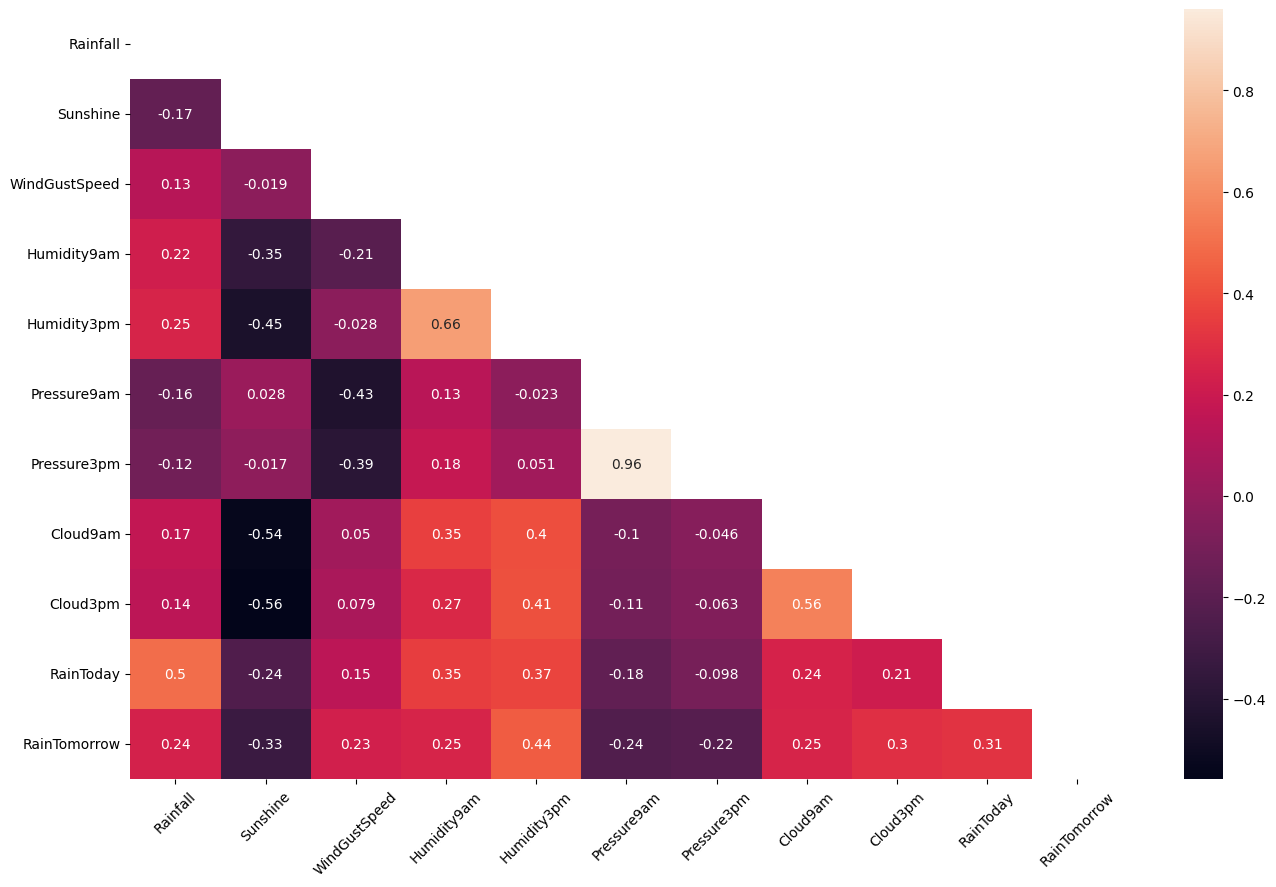

In [28]:
#create heat map
final_train_corr = final_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

5.2 Train and Test split

In [31]:
#X set contains independent variable and y set contains independent varable i.e RainTomorrow. 

X = final_train_data.drop(['RainTomorrow'], axis=1)
y = final_train_data['RainTomorrow']

In [32]:
#Split the data in 80:20 ratio 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(79612, 10) (19904, 10) (79612,) (19904,)


In [33]:
X_test = final_test_data
print(X_test.shape)

(42250, 10)


### 6. Classification Model

6.1 Logistic Regression

In [34]:
#Define model and for the data y_train has the dependent variable
reg_model_lr = LogisticRegression()
reg_model_lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
#Predict model on test data from the original dataset 
reg_model_lr.predict(X_val)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#check accuracy of the model on test data
reg_lr_model_score = reg_model_lr.score(X_val, y_val)
reg_lr_model_accuracy = round(reg_lr_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(reg_lr_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 83.97%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

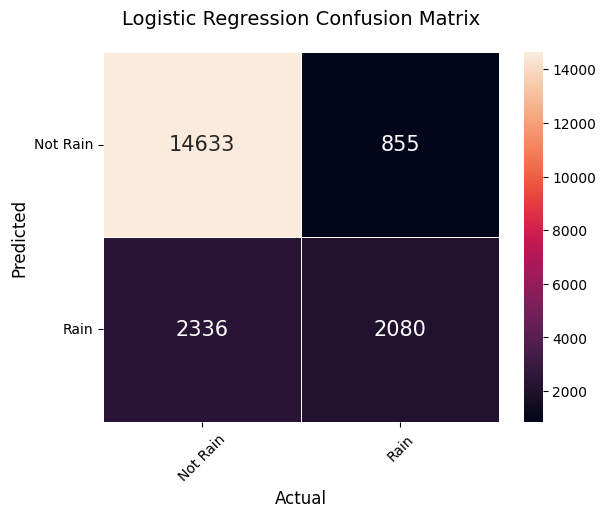

In [37]:
#check accuracy on test data 

y_predw = reg_model_lr.predict(X_val)
con_matrix = confusion_matrix(y_val,y_predw)
axes = sns.heatmap(con_matrix, annot=True, annot_kws={"size": 15}, fmt='g', linewidths=.5)
labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(labels)) + 0.5
ytick_marks = np.arange(len(labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [38]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_predw, target_names=labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.94      0.90     15488
        Rain       0.71      0.47      0.57      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.71      0.73     19904
weighted avg       0.83      0.84      0.83     19904



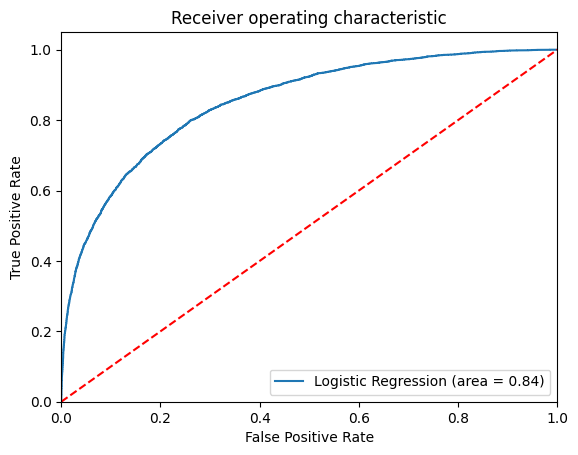

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_val, y_predw)
fpr, tpr, thresholds = roc_curve(y_val, reg_model_lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % reg_lr_model_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

6.1 K-Nearest Neighbours Model 

In [39]:
#define model and fit data on model
reg_model_knn= KNeighborsClassifier() #default value n_neighbors=5
reg_model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
reg_model_knn.predict(X_val)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
score_knn= reg_model_knn.score(X_val, y_val)
accuracy_knn= round(score_knn*100, 2)
print("The classification accuracy of KNN is "+ str(accuracy_knn)+"%")

The classification accuracy of KNN is 82.98%


Text(0.5, 1.0, 'KNN Confusion Matrix')

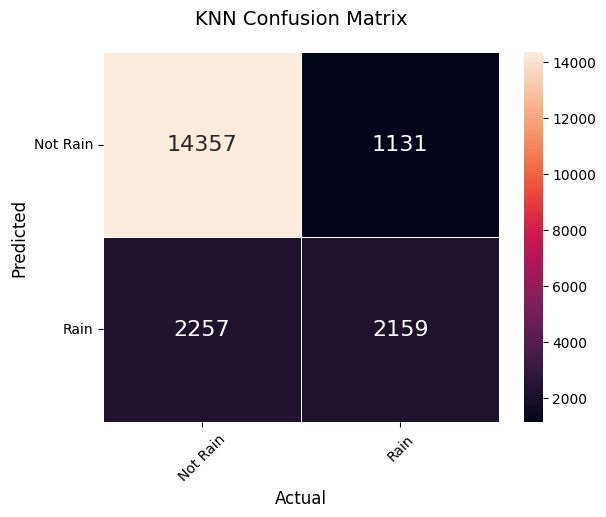

In [42]:
y_pred_knn = reg_model_knn.predict(X_val)
cm_knn = confusion_matrix(y_val,y_pred_knn)
axes = sns.heatmap(cm_knn, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(labels)) + 0.5
ytick_marks = np.arange(len(labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [43]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred_knn, target_names=labels))

KNN Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.93      0.89     15488
        Rain       0.66      0.49      0.56      4416

    accuracy                           0.83     19904
   macro avg       0.76      0.71      0.73     19904
weighted avg       0.82      0.83      0.82     19904



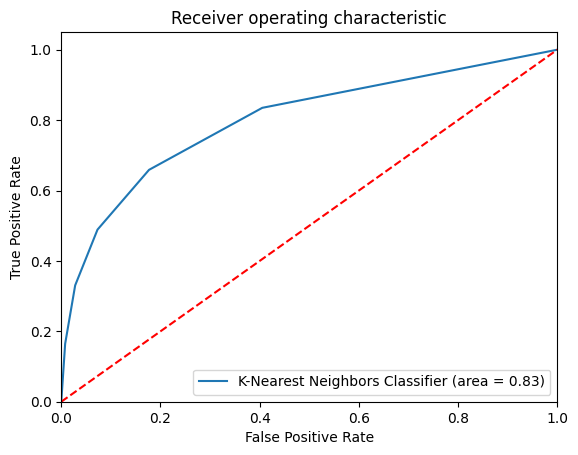

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_val, y_predw)
fpr, tpr, thresholds = roc_curve(y_val, reg_model_knn.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K-Nearest Neighbors Classifier (area = %0.2f)' % score_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

6.2 Support Vector Machine Model 

In [55]:
reg_model_svm = SVC(probability=True)
reg_model_svm.fit(X_train, y_train)

SVC(probability=True)

In [56]:
reg_model_svm.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
score_svm= reg_model_svm.score(X_val, y_val)
accuracy_svc= round(score_svm*100, 2)
print("The classification accuracy of KNN is "+ str(accuracy_svc)+"%")

The classification accuracy of KNN is 83.77%


Text(0.5, 1.0, 'SVM Confusion Matrix')

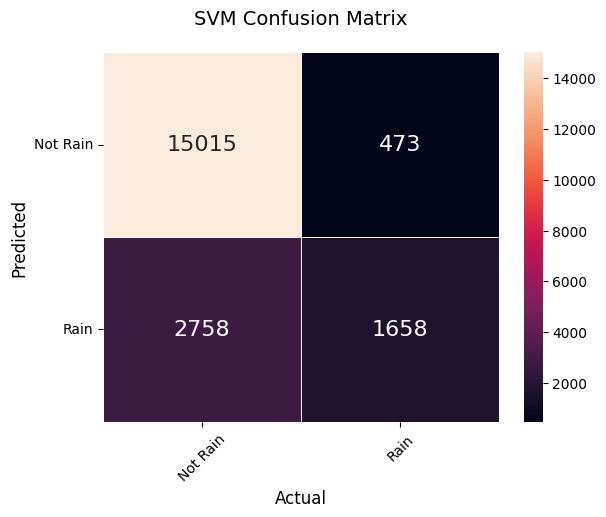

In [58]:
y_pred_svc = reg_model_svm.predict(X_val)
cm_svm = confusion_matrix(y_val,y_pred_svc)
axes = sns.heatmap(cm_svm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(labels)) + 0.5
ytick_marks = np.arange(len(labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(labels, rotation=0)

axes.set_title('SVM Confusion Matrix', fontsize=14, pad=20)

In [59]:
print('SVM Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred_svc, target_names=labels))

SVM Classification Report

              precision    recall  f1-score   support

    Not Rain       0.84      0.97      0.90     15488
        Rain       0.78      0.38      0.51      4416

    accuracy                           0.84     19904
   macro avg       0.81      0.67      0.70     19904
weighted avg       0.83      0.84      0.81     19904



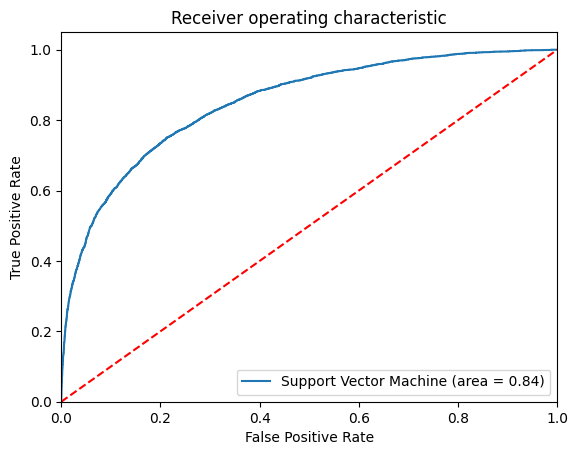

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_val, y_predw)
fpr, tpr, thresholds = roc_curve(y_val, reg_model_svm.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % score_svm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()